# Predict Boston Hosing Prices

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

## Loading and Transforming the Data

In [2]:
# Importing the data from sklearn.datasets
from sklearn.datasets import load_boston
boston = load_boston()
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [3]:
# Data transformation
df_x = pd.DataFrame(boston.data, columns = boston.feature_names)
df_y = pd.DataFrame(boston.target)

In [16]:
df_x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
df_x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Model Initialization 

In [5]:
reg = linear_model.LinearRegression()

In [7]:
#Splitting the data into 67% training and 33% testing data
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.33, random_state = 42)

In [8]:
# Training the model on our training data
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
# Print the coefffecient for each feature of our model
print(reg.coef_)


[[-1.28749718e-01  3.78232228e-02  5.82109233e-02  3.23866812e+00
  -1.61698120e+01  3.90205116e+00 -1.28507825e-02 -1.42222430e+00
   2.34853915e-01 -8.21331947e-03 -9.28722459e-01  1.17695921e-02
  -5.47566338e-01]]


In [24]:
# Print the predictions of our data
y_pred_train = reg.predict(x_train)
print(y_pred)

[[28.53469469]
 [36.6187006 ]
 [15.63751079]
 [25.5014496 ]
 [18.7096734 ]
 [23.16471591]
 [17.31011035]
 [14.07736367]
 [23.01064388]
 [20.54223482]
 [24.91632351]
 [18.41098052]
 [-6.52079687]
 [21.83372604]
 [19.14903064]
 [26.0587322 ]
 [20.30232625]
 [ 5.74943567]
 [40.33137811]
 [17.45791446]
 [27.47486665]
 [30.2170757 ]
 [10.80555625]
 [23.87721728]
 [17.99492211]
 [16.02608791]
 [23.268288  ]
 [14.36825207]
 [22.38116971]
 [19.3092068 ]
 [22.17284576]
 [25.05925441]
 [25.13780726]
 [18.46730198]
 [16.60405712]
 [17.46564046]
 [30.71367733]
 [20.05106788]
 [23.9897768 ]
 [24.94322408]
 [13.97945355]
 [31.64706967]
 [42.48057206]
 [17.70042814]
 [26.92507869]
 [17.15897719]
 [13.68918087]
 [26.14924245]
 [20.2782306 ]
 [29.99003492]
 [21.21260347]
 [34.03649185]
 [15.41837553]
 [25.95781061]
 [39.13897274]
 [22.96118424]
 [18.80310558]
 [33.07865362]
 [24.74384155]
 [12.83640958]
 [22.41963398]
 [30.64804979]
 [31.59567111]
 [16.34088197]
 [20.9504304 ]
 [16.70145875]
 [20.23215

In [26]:
# Predicting from test data
y_pred_test = reg.predict(x_test)

In [27]:
#Print the actual value
print(y_test)

        0
173  23.6
274  32.4
491  13.6
72   22.8
452  16.1
..    ...
110  21.7
321  23.1
265  22.8
29   21.0
262  48.8

[167 rows x 1 columns]


In [28]:
#Check the MSE of our model
print(np.mean((y_pred-y_test)**2))

0    20.724023
dtype: float64


In [51]:
reg.score(x_test,y_test)

0.6836471424090702

In [52]:
reg.score(x_train,y_train)

0.7584215241480822

## Model Refinement

In [17]:
# Lets import model_selection from the module cross_val_score
from sklearn.model_selection import cross_val_score

In [19]:
Rcross = cross_val_score(reg, df_x, df_y, cv=4)

In [20]:
Rcross

array([ 0.60217169,  0.60398145,  0.35873597, -1.10867706])

In [21]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.11405301290100711 and the standard deviation is 0.7129565737131163


In [22]:
# Lets Predict the output using 'cros_val_predict'
from sklearn.model_selection import cross_val_predict

In [23]:
yhat = cross_val_predict(reg,df_y, df_x,cv=4)
yhat[0:5]

array([[ 4.23528551e+00,  1.30146562e+01,  1.16862557e+01,
         9.86974373e-02,  5.70349499e-01,  6.37453101e+00,
         6.93734689e+01,  3.60177974e+00,  1.08757977e+01,
         4.32054434e+02,  1.81761916e+01,  3.52309744e+02,
         1.23112305e+01],
       [ 5.20795556e+00,  1.08682431e+01,  1.25806436e+01,
         8.64306808e-02,  5.83966185e-01,  6.25135385e+00,
         7.18787635e+01,  3.46186850e+00,  1.18498300e+01,
         4.54700328e+02,  1.84663703e+01,  3.43836883e+02,
         1.36522006e+01],
       [-1.01201762e-01,  2.25840812e+01,  7.69877620e+00,
         1.53386727e-01,  5.09641774e-01,  6.92369580e+00,
         5.82040305e+01,  4.22555067e+00,  6.53323667e+00,
         3.31091492e+02,  1.68824783e+01,  3.90084584e+02,
         6.33273908e+00],
       [ 4.25661178e-01,  2.14214408e+01,  8.18323633e+00,
         1.46742233e-01,  5.17017479e-01,  6.85697485e+00,
         5.95610651e+01,  4.14976542e+00,  7.06083754e+00,
         3.43358017e+02,  1.70396584e

In [29]:
#Lets Evaluate the data by Visulization
#Impoting the required libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


C:\Users\sagar\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [33]:
#Creating a function for plotting the data
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')

    plt.show()

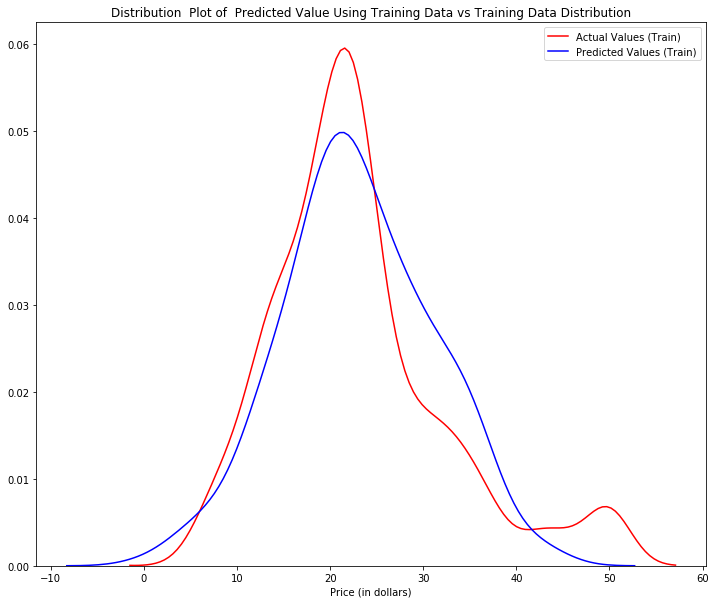

In [34]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, y_train_pred, "Actual Values (Train)", "Predicted Values (Train)", Title)

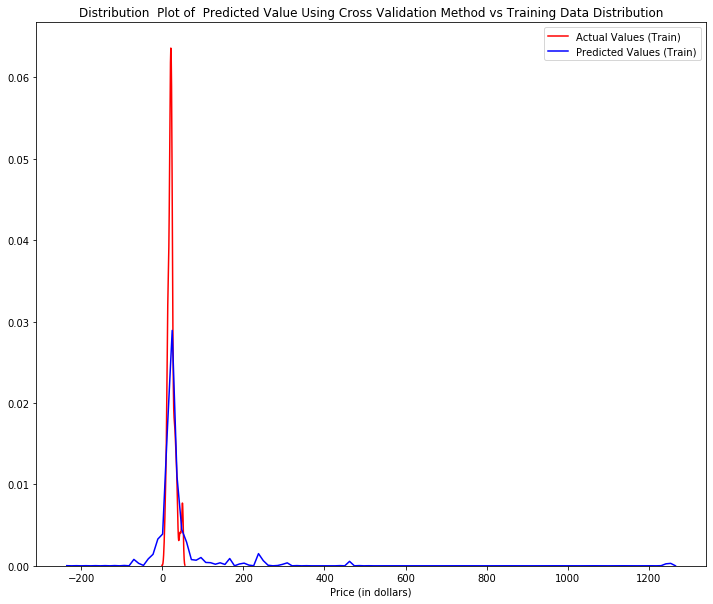

In [54]:
Title = 'Distribution  Plot of  Predicted Value Using Cross Validation Method vs Training Data Distribution'
DistributionPlot(y_train, yhat, "Actual Values (Train)", "Predicted Values (Train)", Title)

In [35]:
# Lets try to further refine the model
from sklearn.preprocessing import PolynomialFeatures

In [36]:
#Lets split the data again
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.30, random_state=0)

In [37]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False,
                   order='C')

In [39]:
poly = linear_model.LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([[22.74827926],
       [33.89592276],
       [53.86064042],
       [-5.85306006],
       [16.7223148 ]])

In [41]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [[22.74827926]
 [33.89592276]
 [53.86064042]
 [-5.85306006]]
True values: [[22.6]
 [50. ]
 [23. ]
 [ 8.3]]


In [45]:
poly.score(x_train_pr, y_train)

1.0

In [46]:
poly.score(x_test_pr, y_test)

-176.88306227346263

As we notice R^2 in both the other cases goes down which suggest that the first linear regression model is the best one.